# RL Graph Environment: Learning from many instances

In [1]:
from job_shop_lib.reinforcement_learning import (
    MultiJobShopGraphEnv,
    ObservationSpaceKey,
    ObservationDict,
)
from job_shop_lib.dispatching import DispatcherObserverConfig
from job_shop_lib.dispatching.feature_observers import (
    FeatureObserverType,
    FeatureType,
)
from job_shop_lib.graphs import build_agent_task_graph
from job_shop_lib.generation import GeneralInstanceGenerator

In [2]:
generator = GeneralInstanceGenerator(
    num_jobs=(3, 6), num_machines=(3, 5), allow_less_jobs_than_machines=False
)
feature_observer_configs = [
    DispatcherObserverConfig(
        FeatureObserverType.IS_READY,
        kwargs={"feature_types": [FeatureType.JOBS]},
    )
]

env = MultiJobShopGraphEnv(
    instance_generator=generator,
    feature_observer_configs=feature_observer_configs,
    graph_initializer=build_agent_task_graph,
    render_mode="human",  # Try "save_video"
    render_config={"video_config": {"fps": 4}},
)

In [3]:
import random

random.seed(100)


def random_action(observation: ObservationDict) -> tuple[int, int]:
    ready_operations = []
    for operation_id, is_ready in enumerate(
        observation[ObservationSpaceKey.JOBS.value].ravel()
    ):
        if is_ready == 1.0:
            ready_operations.append(operation_id)

    operation_id = random.choice(ready_operations)
    machine_id = -1  # We can use -1 if each operation can only be scheduled
    # in one machine.
    return (operation_id, machine_id)

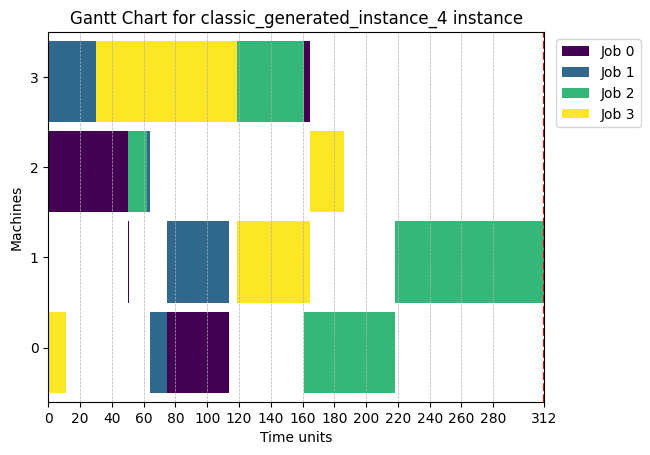

In [4]:
from IPython.display import clear_output

n_episodes = 3
instances = []
total_rewards = []
for _ in range(n_episodes):
    done = False
    obs, _ = env.reset()
    while not done:
        action = random_action(obs)
        obs, reward, done, *_ = env.step(action)
        if env.render_mode == "human":
            env.render()
            clear_output(wait=True)
    if env.render_mode == "save_video" or env.render_mode == "save_gif":
        env.render()

    instances.append(env.dispatcher.instance)
    total_rewards.append(sum(env.reward_function.rewards))

In [7]:
for instance, total_reward in zip(instances, total_rewards):
    print(f"Instance: {instance}")
    print(f"Total reward: {total_reward}")
    print()

Instance: JobShopInstance(name=classic_generated_instance_2, num_jobs=4, num_machines=5)
Total reward: -495

Instance: JobShopInstance(name=classic_generated_instance_3, num_jobs=6, num_machines=5)
Total reward: -666

Instance: JobShopInstance(name=classic_generated_instance_4, num_jobs=4, num_machines=4)
Total reward: -312



In [8]:
env.reset()

({'removed_nodes': array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True]),
  'edge_index': array([[ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,
           3,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,
           6,  6,  6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,
           9,  9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12,
          12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15,
          15, 15, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17,
          18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, -1, -1,
          -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
          -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
          -1, -1, -1

In [9]:
for key, array in obs.items():
    print(key, array.shape)

removed_nodes (35,)
edge_index (2, 200)
jobs (6, 1)


In [10]:
env.observation_space

Dict('edge_index': MultiDiscrete([[36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36
  36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36
  36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36
  36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36
  36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36
  36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36
  36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36
  36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36
  36 36 36 36 36 36 36 36]
 [36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36
  36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36
  36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36
  36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36
  36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36